# Regression Modelling with Decision Tree and Random Forest Models

Example of:
- Decision tree regression modelling
- Optimisation of decision tree model by finding the best leaf size
- Comparison of optimal decision tree with random forest regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [3]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The dependent (target/outcome) variable is the 'MEDV' column. All the rest are predictors/features.

In [4]:
X = boston['data']#df.iloc[:, :-1].to_numpy()
y = boston['target'].reshape(-1,1)#.to_numpy().reshape(-1,1)
X.shape, y.shape

((506, 13), (506, 1))

In [5]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)
X_train.shape, X_test.shape

((379, 13), (127, 13))

# Decision Trees

In [7]:
# Fit model and make predictions
def decision_tree(X, y, validation_size=None, max_leaf_nodes=None, random_state=None):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
    # Build and fit the model
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=random_state)
    model.fit(X_train, y_train)
    # Get predictions
    preds = model.predict(X_test)
    # Get error value
    MAE = mean_absolute_error(y_test, preds)
    
    output = {'model':model, 'X_train':X_train, 'y_train':y_train, 
              'X_test':X_test, 'y_test':y_test.flatten(), 'predictions':preds, 'MAE':MAE}
    
    return output

In [8]:
tree_model = decision_tree(X, y, random_state=21)
print(f"First 5 predictions:\nPRED: {tree_model['predictions'][:5]}\nTRUE: {tree_model['y_test'][:5]}")
print(f"Mean absolute error: {tree_model['MAE']:.2f}")

First 5 predictions:
PRED: [16.4 15.6 25.  50.  27.9]
TRUE: [14.1 13.4 22.1 41.7 28.5]
Mean absolute error: 3.07


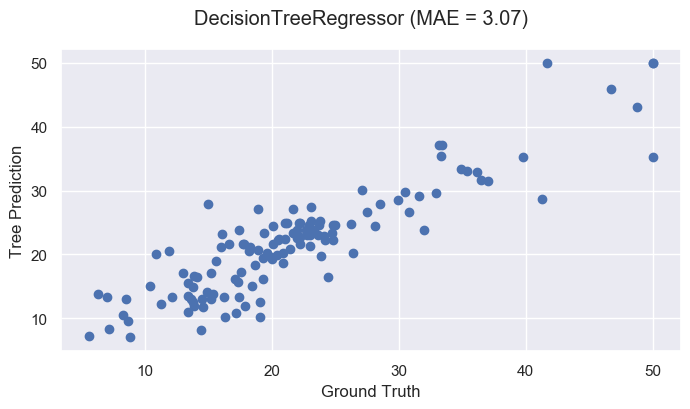

In [9]:
def plot_model_performance(model, hypers=None):
    model_name = type(model['model']).__name__
    if hypers!=None:
        if type(hypers) != list: 
            hypers = [hypers]
        hyperparameters = [f'{i}={v}' for i, v in tree_model['model'].get_params().items() if i in hypers]
        hyperparameter_str = f'\n{hyperparameters}'
    else:
        hyperparameter_str = ''
    
    
    fig, ax = plt.subplots(figsize=(8,4),dpi=100)
    ax.scatter(model['y_test'], model['predictions'])
    ax.set_xlabel('Ground Truth')
    ax.set_ylabel('Tree Prediction')
    plt.suptitle(f"{model_name} (MAE = {model['MAE']:.2f}){hyperparameter_str}")
    plt.show()

plot_model_performance(model=tree_model)

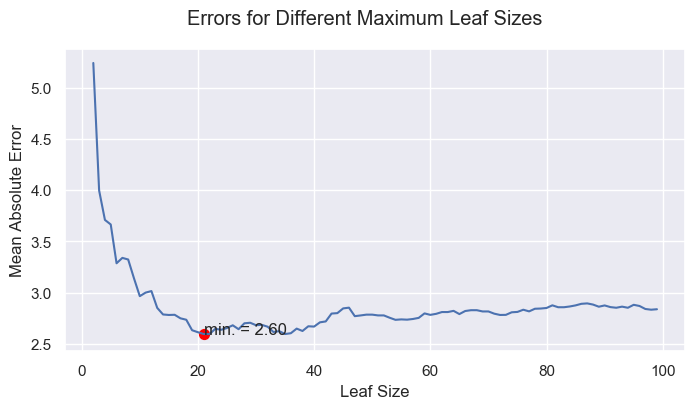

In [10]:
MAEs = []
min_leaves = 2
max_leaves = 100

for leaves in range(min_leaves, max_leaves):
    model = decision_tree(X, y, max_leaf_nodes=leaves, random_state=21)
    MAEs.append(model['MAE'])

optimal_leaves = np.argmin(MAEs) + min_leaves

fig, ax = plt.subplots(figsize=(8,4), dpi=100)
ax.plot(range(min_leaves,max_leaves), MAEs)
ax.scatter([optimal_leaves], [min(MAEs)], s=50, c='red')
ax.text(optimal_leaves, min(MAEs), f"min. = {min(MAEs):.2f}")
ax.set_xlabel('Leaf Size')
ax.set_ylabel('Mean Absolute Error')
plt.suptitle('Errors for Different Maximum Leaf Sizes')
plt.show()

In [11]:
optimal_tree_model = decision_tree(X, y, max_leaf_nodes=optimal_leaves, random_state=21)
print(f"First 5 predictions:\nPRED: {optimal_tree_model['predictions'][:5]}\nTRUE: {optimal_tree_model['y_test'][:5]}")
print(f"Mean absolute error: {optimal_tree_model['MAE']:.2f}")

First 5 predictions:
PRED: [16.17333333 14.98333333 24.23214286 47.02631579 30.22857143]
TRUE: [14.1 13.4 22.1 41.7 28.5]
Mean absolute error: 2.60


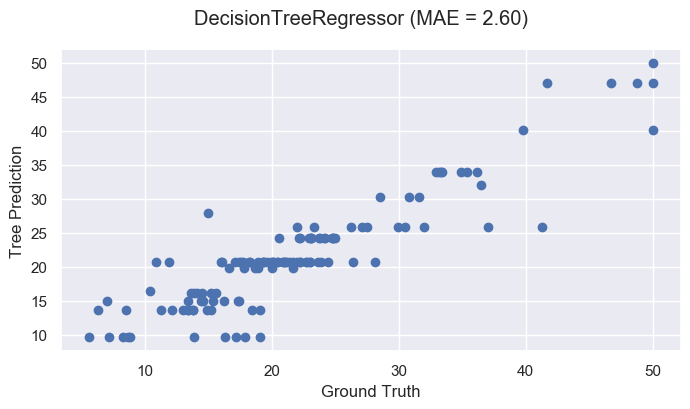

In [12]:
plot_model_performance(model=optimal_tree_model)

# Random Forests

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
# Fit model and make predictions
def random_forest(X, y, validation_size=None, random_state=None):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
    # Build and fit the model
    model = RandomForestRegressor(random_state=random_state)
    model.fit(X_train, y_train.reshape(-1))
    # Get predictions
    preds = model.predict(X_test)
    # Get error value
    MAE = mean_absolute_error(y_test, preds)
    
    output = {'model':model, 'X_train':X_train, 'y_train':y_train, 
              'X_test':X_test, 'y_test':y_test.flatten(), 'predictions':preds, 'MAE':MAE}
    
    return output
forest_model = random_forest(X, y, random_state=21)

print(f"First 5 predictions:\nPRED: {forest_model['predictions'][:5]}\nTRUE: {forest_model['y_test'][:5]}")
print(f"Mean absolute error: {forest_model['MAE']:.2f}")

First 5 predictions:
PRED: [15.468 15.009 24.696 46.843 32.421]
TRUE: [14.1 13.4 22.1 41.7 28.5]
Mean absolute error: 2.21


In [15]:
pct_better = 100 * ((optimal_tree_model['MAE']/forest_model['MAE']) - 1)
print(f"Forest was {pct_better:.2f}% better than tree.")

Forest was 17.66% better than tree.


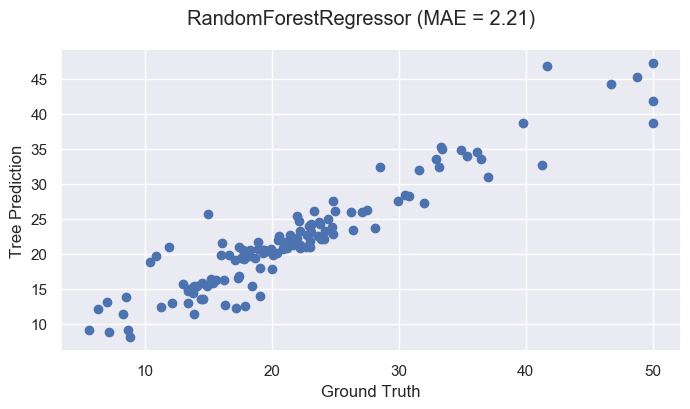

In [16]:
plot_model_performance(model=forest_model)